## Skin Cancer Detection¶
#### Project description
Skin cancer is the most common form of cancer, globally accounting for at least 40% of cancer cases. People with lighter skin are at higher risk. There are three main types of skin cancers: basal-cell skin cancer (BCC), squamous-cell skin cancer (SCC), and melanoma. Globally in 2012, melanoma occurred in 232,000 people and resulted in 55,000 deaths. Between 20% and 30% of melanomas develop from moles.

#### Task
In this project, we will develop deep learning-based solutions to classify images of skin moles into benign or malignant categories.

#### Data
The training and test set contains 2,637 and 660 images, respectively. The dataset is from a Kaggle Competition at https://www.kaggle.com/fanconic/skin-cancer-malignant-vs-benign. The 'data' folder structure is as below

- data
    - train
        - benign
        - malignant
    - test
        - benign
        - malignant

#### Code templates
- If you have a computer with a large-size RAM (>8GB) and a fast CPU, you can download the data(zip file) to work on your own computer. You need to manually unzip the data file.
 - If you would like to use google colab, you can download the 'colab' template, and upload the code file and data zip file to your Google Drive; then open and edit the code using the Google Colab. The 3rd code cell will unzip the data file automatically.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#unzip the image set. You only need to run this cell once.
#you may need to change the folders bellow
!unzip '/content/data.zip' -d '/content/'
print('unziped the image set to /content/ Notebooks/')

Archive:  /content/data.zip
   creating: /content/data/
   creating: /content/data/test/
   creating: /content/data/test/benign/
  inflating: /content/data/test/benign/1.jpg  
  inflating: /content/data/test/benign/10.jpg  
  inflating: /content/data/test/benign/1003.jpg  
  inflating: /content/data/test/benign/1006.jpg  
  inflating: /content/data/test/benign/1013.jpg  
  inflating: /content/data/test/benign/1018.jpg  
  inflating: /content/data/test/benign/1019.jpg  
  inflating: /content/data/test/benign/1023.jpg  
  inflating: /content/data/test/benign/1025.jpg  
  inflating: /content/data/test/benign/1029.jpg  
  inflating: /content/data/test/benign/1033.jpg  
  inflating: /content/data/test/benign/1034.jpg  
  inflating: /content/data/test/benign/1042.jpg  
  inflating: /content/data/test/benign/1044.jpg  
  inflating: /content/data/test/benign/105.jpg  
  inflating: /content/data/test/benign/1055.jpg  
  inflating: /content/data/test/benign/1061.jpg  
  inflating: /content/data/

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

### 1. Data preparation

In [7]:
import os
from PIL import Image

#1.1 get image lists
train_b = 'data/train/benign'
train_m = 'data/train/malignant'

test_b = 'data/test/benign'
test_m = 'data/test/malignant'

def getImList(folder):
    # get the list of file names in 'folder'
    imList = os.listdir(folder) # get all names
    fPath = [os.path.join(folder, fName) for fName in imList] # add path to names

    return fPath

trainList_b = getImList(train_b)
trainList_m = getImList(train_m)
trainList = trainList_b + trainList_m
print("# training images:", len(trainList))

testList_b = getImList(test_b)
testList_m = getImList(test_m)
testList = testList_b + testList_m
print("# test images:", len(testList))

#1.2 load all images
read = lambda imName: np.asarray(Image.open(imName).convert("RGB"))
print('loading images ...')
X_train = [read(name) for name in trainList]
X_train = np.array(X_train, dtype='uint8')/255
print('.   training set shape:', X_train.shape)

X_test = [read(name) for name in testList]
X_test = np.array(X_test, dtype='uint8')/255
print('.   test set shape:', X_test.shape)

print('loading ended.')

# 1.3 Create target labels
y_benign_train = np.zeros(len(trainList_b))
y_malignant_train = np.ones(len(trainList_m))
y_train = np.concatenate((y_benign_train, y_malignant_train), axis = 0)
print('.    training target shape: ', y_train.shape)
y_benign_test = np.zeros(len(testList_b))
y_malignant_test = np.ones(len(testList_m))
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)
print('.    test target shape', y_test.shape)

# 1.4 Shuffle data
print('shuffling data ...')
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

print('Dataset is ready for using.')

# training images: 2637
# test images: 660
loading images ...
.   training set shape: (2637, 224, 224, 3)
.   test set shape: (660, 224, 224, 3)
loading ended.
.    training target shape:  (2637,)
.    test target shape (660,)
shuffling data ...
Dataset is ready for using.


# 2. Building the CNN Model



In [12]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Build the CNN Model
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening the output
model.add(layers.Flatten())

# Fully connected (Dense) Layer 1
model.add(layers.Dense(512, activation='relu'))

# Output layer (binary classification: benign = 0, malignant = 1)
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the Model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

# 2.1. Training the Model

In [13]:
# Train the Model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 393s 5s/step - accuracy: 0.6477 - loss: 0.8727 - val_accuracy: 0.7833 - val_loss: 0.4084
Epoch 2/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 414s 5s/step - accuracy: 0.7889 - loss: 0.4285 - val_accuracy: 0.8121 - val_loss: 0.4260
Epoch 3/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 425s 5s/step - accuracy: 0.8094 - loss: 0.3855 - val_accuracy: 0.8136 - val_loss: 0.3902
Epoch 4/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 455s 5s/step - accuracy: 0.8265 - loss: 0.3638 - val_accuracy: 0.8015 - val_loss: 0.4585
Epoch 5/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 437s 5s/step - accuracy: 0.8178 - loss: 0.3791 - val_accuracy: 0.8030 - val_loss: 0.3991
Epoch 6/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 425s 5s/step - accuracy: 0.8474 - loss: 0.3091 - val_accuracy: 0.7909 - val_loss: 0.3989
Epoch 7/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 443s 5s/step - accuracy: 0.8469 - loss: 0.3138 - val_accuracy: 0.7591 - val_loss: 0.6015
Epoch 8/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 443s 5s/step - accuracy: 0.8789 - loss: 0.2634 - val_accuracy: 0.8061 - v

# 2.2. Testing the Model

In [14]:
# Evaluate the Model on the Test Data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8145 - loss: 1.2507
Test Loss: 1.3934080600738525, Test Accuracy: 0.800000011920929


# 2.3. Plotting the Model

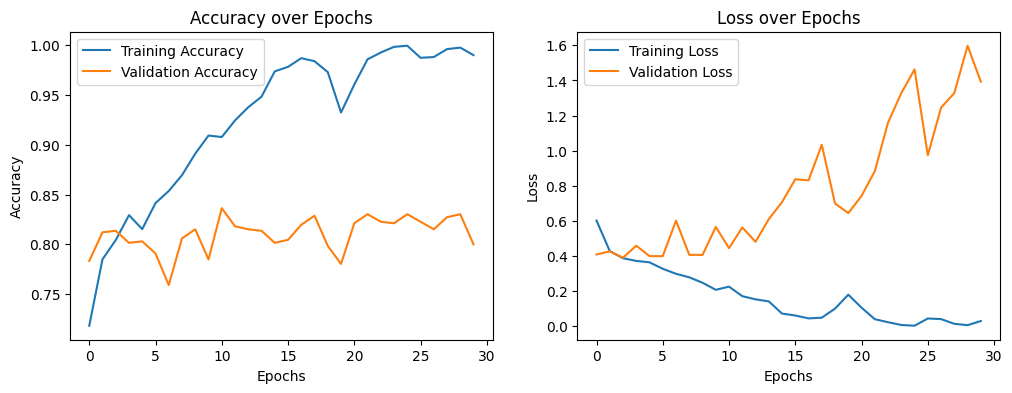

In [15]:
# Plot the Training & Validation Accuracy and Loss
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()